In [1]:
# benötigte bibloitheken  importieren

import pandas as pd 
import plotly.express as px 
import numpy as np 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import seaborn as sns 

In [2]:
df = pd.read_pickle('ecar_after_preprocessing.pkl')      
df.head(5)   

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro,max_chrgtime_in_min,Battery,g_force
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Sedan,5,55480,28.723000,72.449997,0.615560
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Hatchback,5,30000,64.800003,45.090000,0.283158
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Liftback,5,56440,38.709999,72.400002,0.602463
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,SUV,5,68040,38.570999,74.160004,0.416408
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Hatchback,4,32997,53.683998,28.559999,0.298061


#   Visualisierung

## Business Frage: Wie stehe ich im Vergleich zu meinen Mitbewerbern dar

**Welche Modelle vergleichen wir.**

In [3]:
df_mercedes = df[df.Brand == 'Mercedes']
df_mercedes

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro,max_chrgtime_in_min,Battery,g_force
10,10,Mercedes,EQC 400 4MATIC,5.1,180,370,216,440,Yes,AWD,SUV,5,69484,50.455002,79.919998,0.555211
39,39,Mercedes,EQA,5.0,200,350,171,440,Yes,AWD,SUV,5,45000,47.727001,59.849998,0.566316
83,84,Mercedes,EQV 300 Long,10.0,140,330,273,290,Yes,FWD,SPV,7,70631,68.276001,90.089996,0.283158


Es existieren 2 Preiskategorien: 
          2 Auto mit Price 69484 und 70631
          1 Auto mit Price 45000

In [4]:
fig_norapid = px.scatter(data_frame=df_mercedes,
                         x='TopSpeed_KmH',
                         y='PriceEuro',
                         color='BodyStyle',
                         symbol='PowerTrain',
                         title='Welches unserer Modelle ist das Beste?',
                         hover_data=['Seats','Model'])

fig_norapid.show() 

1. Mercedes EQV 300 Long - das teurste Auto ist aber für 7 Personen ausgelegt. Geegnet für große Familien und lange Fernreisen. 

2. Vergleichen wir dieses Modell mit anderen ähnlichen Modellen. 

**Mercedes EQV 300 Long**

In [5]:
df_mercedes_eqv = df.loc[df['BodyStyle']=='SPV']
df_mercedes_eqv

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro,max_chrgtime_in_min,Battery,g_force
65,66,Nissan,e-NV200 Evalia,14.0,123,190,200,190,Yes,FWD,SPV,7,33246,60.000000,38.000000,0.202256
67,68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,0,No,FWD,SPV,5,38000,0.000000,31.040001,0.126410
83,84,Mercedes,EQV 300 Long,10.0,140,330,273,290,Yes,FWD,SPV,7,70631,68.276001,90.089996,0.283158


In [6]:
fig_marktcheck = px.scatter(data_frame=df_mercedes_eqv,
                            x='Range_Km',
                            y='PriceEuro',
                            color='Model',
                            size='Seats',
                            size_max=50,
                            title='Marktcheck: Mercedes EQV 300 Long',
                            labels={'PriceEuro':'Preis in EUR','Range_Km':'Reichweite in km','Model': 'Model: farblich, Seats: Größe'})


fig_marktcheck.show() 

**Mercedes EQV 300 Long Vs Renault Kangoo** 


 Renault Kangoo. Dieses Modell hat nur 5 Sitze, hat keine Schnelldadefunktion, was für lange Fahrten sehr wichtig ist. Der Vergleich ist nicht relevant.

**Mercedes EQV 300 Long Vs Nissan e-NV200 Evalia**


In [7]:
df_mercedes_eqv2 = df.iloc[[65, 83]]
df_mercedes_eqv2

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro,max_chrgtime_in_min,Battery,g_force
65,66,Nissan,e-NV200 Evalia,14.0,123,190,200,190,Yes,FWD,SPV,7,33246,60.000000,38.000000,0.202256
83,84,Mercedes,EQV 300 Long,10.0,140,330,273,290,Yes,FWD,SPV,7,70631,68.276001,90.089996,0.283158


In [8]:
fig_marktcheck2 = px.scatter(data_frame=df_mercedes_eqv2,
                            x='Range_Km',
                            y='AccelSec',
                            color='Model',
                            size='FastCharge_KmH',
                            size_max=50,
                            title='Marktcheck: Mercedes EQV 300 Long',
                            labels={'PriceEuro':'Preis in EUR','Range_Km':'Reichweite in km','Model': 'Model: farblich, FastCharge_KmH: Größe'})


fig_marktcheck2.show() 

**deskriptive Part**

x-Achse zeigt die Reichweite in km an. Je höher der Wert desto weiter kann ein Auto mit einer Tankladung fahren.

Auf der y-Achse ist der Preis abgetragen. Je höher der Preis, desto teurer das Auto. 

Die Farben zeigen das Modell. Die Bubble zeigt die Effiziens des Schnellladenfunktion.

**analytische Part**

Die Modelle haben völlig unterschiedliche Preiskategorien. Nissan is doppelt billiger als Mercedes, aber in einer 

Wirtschaftskrise ist es wichtig, diese Modelle zu vergleichen, um herauszufinden, worauf Mercedes in Werbe- und 

Marketingkampagnen  achten sollte, damit sich die Kunden nicht entscheiden zu sparen.  

**Vorteile von Mercedes:**

Schnelle Beschleinigung

Höchstgeschwindigkeit ist 140 gegen 123.

Reichwerte ist 330 und 290 nach der Schnellladung.

Leistungstrake Batterie






**Mercedes EQC 400 4MATIC und Mercedes EQA** 

In [9]:
df_mercedes2 = df.iloc[[10, 39]]
df_mercedes2

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro,max_chrgtime_in_min,Battery,g_force
10,10,Mercedes,EQC 400 4MATIC,5.1,180,370,216,440,Yes,AWD,SUV,5,69484,50.455002,79.919998,0.555211
39,39,Mercedes,EQA,5.0,200,350,171,440,Yes,AWD,SUV,5,45000,47.727001,59.849998,0.566316


Diese beiden Modellen sind sehr ähnlich, aber der Preis ist unterschiedlich. 

Gedanken. Warum sollte die Marke zwei so änliche Modelle haben und warum sollten Kunden mehr bezahlen. (Keine Information in Daten)

Auserdem hat Mercedes EQA weniger Beschleunigungszeit und höhere Höchstgeschwindigkeit.

Die Reichwerte ist nach dem schnellen Aufladen gleich, aber mehr als einfache Reichwerte? Datenfehler oder? 

**Mercedes EQA**

Vergleichen wir dieses Modell mit den Modellen dieser Preisklasse und BodyStyle

In [10]:
df_mercedes_eqa = df.loc[(df['PriceEuro'] <= 50000) & (df['PriceEuro'] >= 40000) & (df['BodyStyle'] == 'SUV')]
df_mercedes_eqa = df_mercedes_eqa.sort_values(by='TopSpeed_KmH', ascending = False)
df_mercedes_eqa

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro,max_chrgtime_in_min,Battery,g_force
39,39,Mercedes,EQA,5.0,200,350,171,440,Yes,AWD,SUV,5,45000,47.727001,59.849998,0.566316
82,83,Ford,Mustang Mach-E SR RWD,6.6,180,360,194,380,Yes,RWD,SUV,5,46900,56.841999,69.839996,0.429027
87,88,Skoda,Enyaq iV vRS,6.2,180,400,193,540,Yes,AWD,SUV,5,47500,44.444000,77.199997,0.456706
12,12,Hyundai,Kona Electric 64 kWh,7.9,167,400,160,380,Yes,FWD,SUV,5,40795,63.158001,64.000000,0.358428
25,25,Volkswagen,ID.4,7.5,160,420,183,560,Yes,RWD,SUV,5,45000,45.000000,76.860001,0.377544
36,36,Lexus,UX 300e,7.5,160,270,193,190,Yes,FWD,SUV,5,50000,85.263000,52.110001,0.377544
52,53,Skoda,Enyaq iV 80,8.8,160,420,183,560,Yes,RWD,SUV,5,40000,45.000000,76.860001,0.321770
70,71,Skoda,Enyaq iV 80X,7.0,160,400,193,540,Yes,AWD,SUV,5,45000,44.444000,77.199997,0.404511
57,58,Citroen,e-C4,9.7,150,250,180,380,Yes,FWD,SUV,5,40000,39.473999,45.000000,0.291915


In [11]:
fig_marktcheck3 = px.scatter(data_frame=df_mercedes_eqa,
                            x='Range_Km',
                            y='PriceEuro',
                            color='Model',
                            size='AccelSec',
                            size_max=50,
                            #symbol='PowerTrain',
                            title='Marktcheck: Mercedes EQA',
                            labels={'PriceEuro':'Preis in EUR','Range_Km':'Reichweite in km', 'Model': 'Model: Farbe, Beschleunigung: Größe'},
                            hover_data=['Brand','Model'])


fig_marktcheck3.show() 

Unser Modell befindet sich in der Mitte der Preisklasse. Billiger für 5 Tausend Euro sind  das Citroen e-C4, Skoda Enyaq iV 80 und Hyundai Kona. 5 Tausend Euro teurer ist Lexus UX 300e.  Die Größe des Kreises bedeutet Beschleunigung - je kleiner desto

besser. Mercedes unter den 9 Modellen zeigt die beste Beschleunigung. Was die Reichwerte angeht, ist Mercedes EQA den 

6-Modellen unterlegen. In Zukunft soll der Hersteller sich auf die Steigerung der Batterieleistung konzentrieren, da die 

Reichwerte für Elektrofahrzeuge ein wichtiges Merkmal ist. 

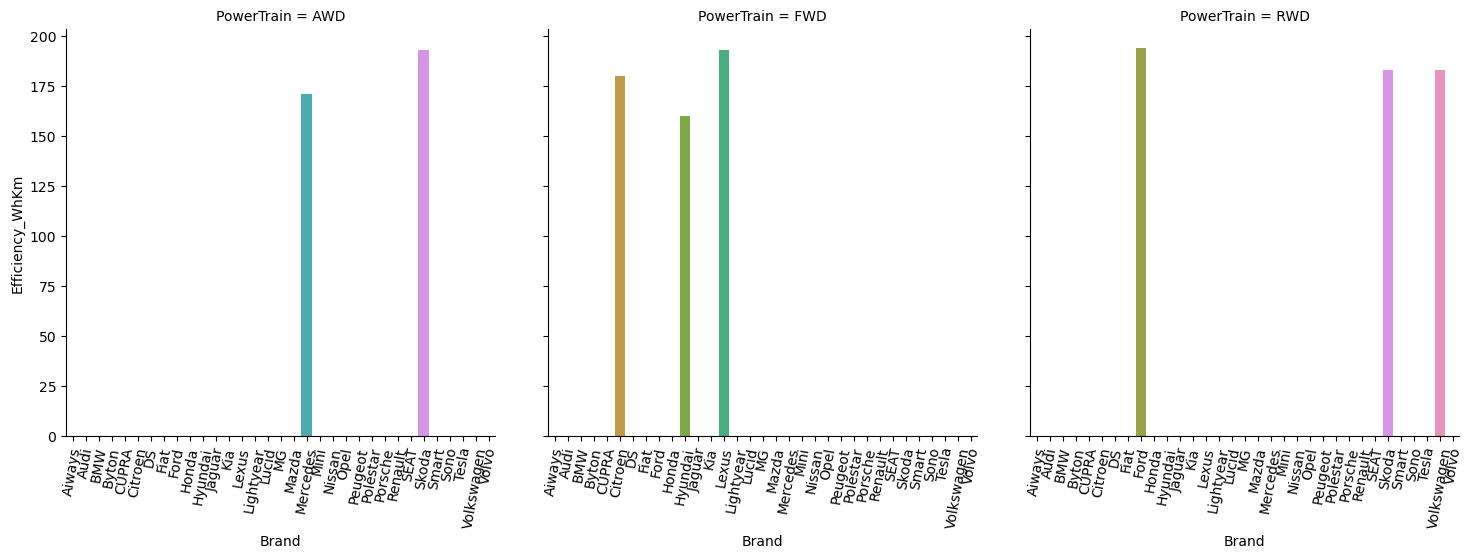

In [12]:
ax = sns.catplot(data=df_mercedes_eqa, x="Brand", y="Efficiency_WhKm", col="PowerTrain",  kind="bar")
ax.set_xticklabels(rotation =80)


Mercedes EQA zeigt einen guten Stromverbrauch pro Kilimeter - 171. Weniger diese Eigenschaft hat nur ein Modell Hyundai - 

160. Darüber hinaus sehen wir, dass es nur wenige Allradmodelle auf dem Markt gibt. Nur Skoda bietet Allradmodelle an. 

Unter bestimmten Umständen kann ein Allradantrieb als Vorteil angesehen werden. 

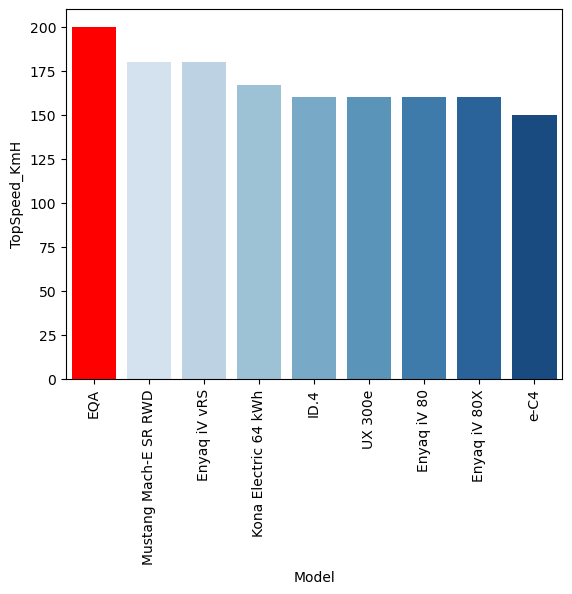

In [14]:
ax = sns.barplot(y='TopSpeed_KmH', x='Model', data=df_mercedes_eqa, palette='Blues')  # barplot erstellen
labels = df_mercedes_eqa['Model'].tolist()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  
# Highlight a specific bar (e.g., 'B')
highlight_index = 0
ax.patches[highlight_index].set_facecolor('red')
 

Mercedes kann bis zu 200 km/h beschleunigen, was im Vergleich zu anderen Modellen ein großer Vorteil ist. 